In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import random as rand

In [2]:
#input the image
path='image_noise.png'
img=cv.imread(path,1)
#img=cv.cvtColor(img,cv.COLOR_BGR2RGB)   
    #getting the image size
rows,columns,channels=img.shape


True

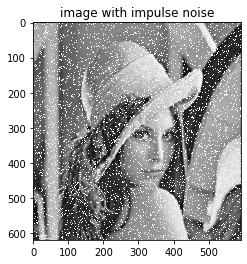

In [6]:
#adding impulse noise to the image

impulse_output = img.copy()
ih=impulse_output.shape[0]    
iw=impulse_output.shape[1]
noisypixels=(ih*iw*10)/100      # number of pixels to be modified
k=0
for i in range(ih*iw):
    if k<noisypixels:
        impulse_output[rand.randrange(0,ih)][rand.randrange(0,iw)]=rand.randrange(250,255) # give random intensity (0-255)              
        k=k+1
    else:
        break
            
plt.imshow(impulse_output)
plt.title("image with impulse noise")
cv.imwrite("impulse_noise.jpg",impulse_output)


True

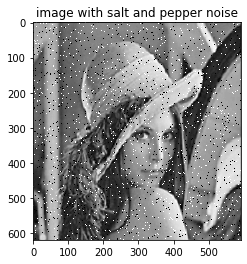

In [7]:
#adding salt and pepper noise to input image

    #probability of noise
p=0.05
    
output=np.zeros(img.shape,np.uint8)
    
    #adding noise
for i in range(rows):
    for j in range(columns):
        r=rand.random()
        if r < p/2:
            output[i][j]=[0,0,0] #adding pepper
        elif r < p:
            output[i][j]=[255,255,255] # adding salt
        else:
            output[i][j]=img[i][j]
    
    
    
    #displaying the image
plt.imshow(output)
plt.title("image with salt and pepper noise")
cv.imwrite("S_p_noise.jpg",output)

True

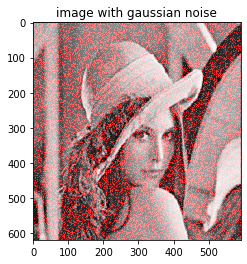

In [13]:
#adding gaussian noise to input image

output_gaussian=np.zeros(img.shape,np.uint8)
mean = 0
sigma=200
cv.randn(output_gaussian,mean,sigma)
noise_img = cv.add(img, output_gaussian)
plt.imshow(noise_img, cmap='gray')
plt.title("image with gaussian noise")
cv.imwrite("Gaussian_noise.jpg",output_gaussian)

True

<Figure size 432x288 with 0 Axes>

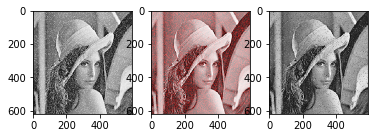

In [24]:
#applying gaussian filter to the above noisy images
plt.figure()
gaussian_impulse = cv.GaussianBlur(impulse_output,(5,5),0) #impulse noise output
gaussian_filter= cv.GaussianBlur(noise_img,(5,5),0) #gaussian noise output
gaussian_s_p= cv.GaussianBlur(output,(5,5),0) #salt and pepper noise output
f,arr = plt.subplots(1,3)
arr[0].imshow(gaussian_impulse)
arr[1].imshow(gaussian_filter)
arr[2].imshow(gaussian_s_p)
cv.imwrite("Gaussian_filter_impulse.jpg",gaussian_impulse)
cv.imwrite("Gaussian_filter_gaussian.jpg",gaussian_filter)
cv.imwrite("Gaussian_filter_s_p.jpg",gaussian_s_p)

True

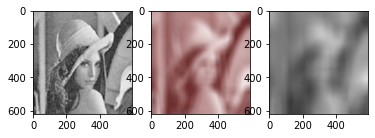

In [25]:
#applying average filter to the above noisy images

blur_impulse = cv.blur(impulse_output,(10,10)) #impulse noise output
blur_gaussian= cv.blur(noise_img,(50,50)) #gaussian noise output
blur_s_p= cv.blur(output,(100,100)) #salt and pepper noise output
f,arr = plt.subplots(1,3)
arr[0].imshow(blur_impulse)
arr[1].imshow(blur_gaussian)
arr[2].imshow(blur_s_p)

cv.imwrite("average_filter_impulse.jpg",blur_impulse)
cv.imwrite("average_filter_gaussian.jpg",blur_gaussian)
cv.imwrite("average_filter_s_p.jpg",blur_s_p)

True

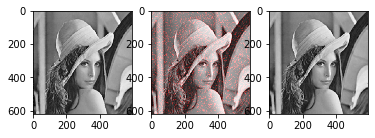

In [27]:
#applying median filter to noisy images

median_impulse = cv.medianBlur(impulse_output,5) #impulse noise output
median_gaussian= cv.medianBlur(noise_img,5) #gaussian noise output
median_s_p= cv.medianBlur(output,5) #salt and pepper noise output
f,arr = plt.subplots(1,3)
arr[0].imshow(median_impulse)
arr[1].imshow(median_gaussian)
arr[2].imshow(median_s_p)
cv.imwrite("median_filter_impulse.jpg",median_impulse)
cv.imwrite("median_filter_gaussian.jpg",median_gaussian)
cv.imwrite("median_filter_s_p.jpg",median_s_p)

True

<Figure size 432x216 with 0 Axes>

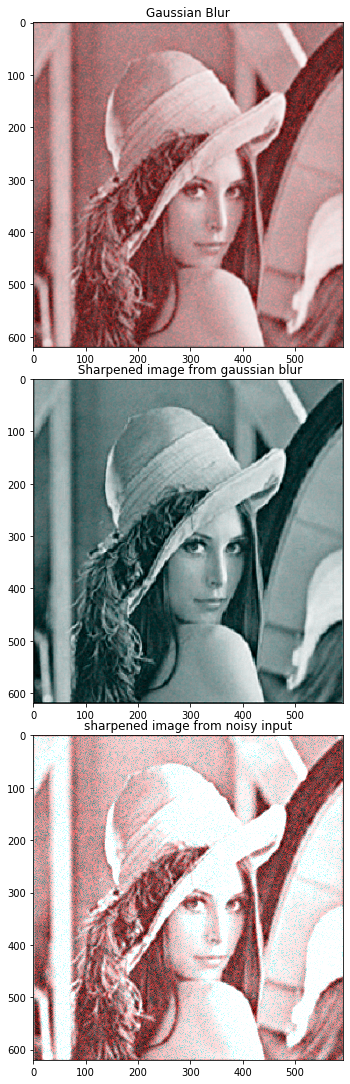

In [28]:
# applying image sharpening on Gaussian Blur using addWeighted function 
plt.figure(figsize=(6,3))
sharpened_gaussian_filter=cv.addWeighted(img,1.5,gaussian_filter,-0.5,0) # subtracting blurred image from original one
sharpened_gaussian_noise=cv.addWeighted(gaussian_filter,1.5,output_gaussian,-0.5,0) # trying to use this on image with gaussian noise - subtracting noisy image from blurred one
f,arr = plt.subplots(3,1,figsize=(15,15))

plt.tight_layout()
arr[0].imshow(gaussian_filter)
arr[1].imshow(sharpened_gaussian_filter)
arr[2].imshow(sharpened_gaussian_noise)
arr[0].title.set_text('Gaussian Blur')
arr[1].title.set_text(' Sharpened image from gaussian blur')
arr[2].title.set_text('sharpened image from noisy input')
plt.savefig('image_sharpening.jpg')

cv.imwrite("sharpened_image1.jpg",sharpened_gaussian_filter)
cv.imwrite("sharpened_image2.jpg",sharpened_gaussian_noise)